In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temps = np.array([280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 
                  290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 
                  300, 302, 303, 304, 305, 306, 308, 309, 
                  310, 311, 315, 316, 317, 318, 319, 320])

280 [10]
281 [15]
282 [23]
283 [36]
284 [55]
285 [101]
286 [145]
287 [202]
288 [270]
289 [374]
290 [473]
291 [716]
292 [888]
293 [1094]
294 [1347]
295 [1545]
296 [2180]
297 [2598]
298 [3009]
299 [3313]
300 [3553]
302 [5582]
303 [6031]
304 [6379]
305 [6585]
306 [6607]
308 [10352]
309 [10926]
310 [11303]
311 [11392]
315 [19238]
316 [22753]
317 [26199]
318 [31033]
319 [37201]
320 [44421]


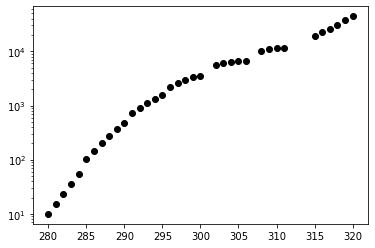

In [3]:
fig, ax = plt.subplots()

for temp in temps:
    
    arr = np.load(f"co2_{temp}K.npy")
    print(temp, arr)
    ax.scatter(temp, arr, color='k')
    
ax.set_yscale('log')